In [1]:
#importing packages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import csv
data=pd.read_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data.csv')

In [3]:
data.head()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,video_profile,clip_frame_rate,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
0,7,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,18,18667784.0,3,8,44.621550,99.406406
1,8,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,19,16379868.0,3,8,44.051502,99.192502
2,9,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,20,14293883.0,3,8,43.408926,98.924590
3,10,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,27,3985062.0,3,8,38.802828,89.462670
4,11,5,1920,1080,1920,1080,19,41249088,17350686,High 4:2:2,30000/1001,29,2969404.0,3,8,37.790129,84.728349


In [4]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.0,5479.000000,5479.000000,5.479000e+03,5.479000e+03,5479.000000,5.410000e+03,5479.000000,5479.000000,2302.000000,4790.000000
mean,5191.563789,58.070451,829.614163,526.817302,1920.0,984.271582,132.718379,1.413721e+08,1.714677e+07,32.146195,9.384927e+05,3.981201,7.981383,32.776278,50.013707
std,3502.790633,44.550308,536.285361,270.136914,0.0,133.045663,73.418579,7.516743e+07,3.122918e+07,9.923897,1.940428e+06,2.591553,5.767905,6.053482,28.610170
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,8.388608e+06,3.208250e+05,18.000000,6.628000e+03,1.000000,1.000000,19.659002,0.065712
25%,3063.500000,29.000000,384.000000,288.000000,1920.0,816.000000,105.000000,9.352000e+07,9.017049e+06,23.000000,1.103292e+05,2.000000,4.000000,27.981235,24.908225
50%,4545.000000,42.000000,640.000000,480.000000,1920.0,1080.000000,135.000000,1.457467e+08,9.609458e+06,30.000000,3.222625e+05,3.000000,7.000000,32.782581,51.108541
75%,9086.500000,106.000000,1280.000000,720.000000,1920.0,1080.000000,151.000000,1.791446e+08,9.934026e+06,40.000000,8.849682e+05,5.000000,11.000000,36.977984,74.964342
max,10918.000000,146.000000,1920.000000,1080.000000,1920.0,1440.000000,396.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,14.000000,32.000000,49.104119,99.479527


In [5]:
#check if there are null values
data.isnull().sum()

encode_id                  0
clip_id                    0
encode_width               0
encode_height              0
clip_width                 0
clip_height                0
clip_duration              0
clip_size                  0
clip_bitrate_total         0
video_profile              0
clip_frame_rate            0
crf                        0
encode_bitrate_video      69
nr_of_images               0
nr_of_image_shifts         0
psnr                    3177
vmaf                     689
dtype: int64

In [6]:
#drop rows
#here I simply dropped the null values and ofcourse lost some info. Later I will try to ampute data with mean.
data=data.dropna()

In [7]:
data.describe()

,encode_id,clip_id,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,psnr,vmaf
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2.251000e+03,2.251000e+03,2251.000000,2.251000e+03,2251.000000,2251.000000,2251.000000,2251.000000
mean,1962.877832,20.087517,835.589516,530.228343,1920.0,958.688583,81.324300,1.521318e+08,3.155681e+07,32.503332,1.081855e+06,3.294980,9.753443,32.889448,47.952569
std,1417.594290,11.655457,536.040883,269.667930,0.0,129.398638,56.861497,9.352530e+07,4.477551e+07,10.406894,2.472067e+06,1.493413,6.591380,6.064508,28.924562
min,7.000000,5.000000,320.000000,240.000000,1920.0,816.000000,19.000000,2.377966e+07,9.017049e+06,18.000000,6.743000e+03,1.000000,1.000000,19.659002,0.065712
25%,620.500000,9.000000,384.000000,288.000000,1920.0,816.000000,19.000000,9.352000e+07,9.609672e+06,23.000000,1.070140e+05,2.000000,6.000000,28.108482,22.438779
50%,1449.000000,15.000000,640.000000,480.000000,1920.0,1056.000000,81.000000,1.438382e+08,9.934026e+06,31.000000,3.280990e+05,3.000000,9.000000,32.950279,48.399590
75%,3432.500000,32.000000,1280.000000,720.000000,1920.0,1080.000000,141.000000,1.824689e+08,1.735069e+07,40.000000,9.366900e+05,4.000000,12.000000,37.068060,73.310365
max,4107.000000,38.000000,1920.000000,1080.000000,1920.0,1080.000000,182.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,7.000000,32.000000,49.104119,99.406406


In [8]:
data.shape

(2251, 17)

In [9]:
#data.to_csv('/Users/sezin/PycharmProjects/Per-Title_encoding/Data/clip_encode_merged_data_wo_null.csv')

In [10]:
#drop ids and psnr column
new_data = data.drop(columns=['encode_id', 'clip_id', 'psnr'])
new_data.describe()

,encode_width,encode_height,clip_width,clip_height,clip_duration,clip_size,clip_bitrate_total,crf,encode_bitrate_video,nr_of_images,nr_of_image_shifts,vmaf
count,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2.251000e+03,2.251000e+03,2251.000000,2.251000e+03,2251.000000,2251.000000,2251.000000
mean,835.589516,530.228343,1920.0,958.688583,81.324300,1.521318e+08,3.155681e+07,32.503332,1.081855e+06,3.294980,9.753443,47.952569
std,536.040883,269.667930,0.0,129.398638,56.861497,9.352530e+07,4.477551e+07,10.406894,2.472067e+06,1.493413,6.591380,28.924562
min,320.000000,240.000000,1920.0,816.000000,19.000000,2.377966e+07,9.017049e+06,18.000000,6.743000e+03,1.000000,1.000000,0.065712
25%,384.000000,288.000000,1920.0,816.000000,19.000000,9.352000e+07,9.609672e+06,23.000000,1.070140e+05,2.000000,6.000000,22.438779
50%,640.000000,480.000000,1920.0,1056.000000,81.000000,1.438382e+08,9.934026e+06,31.000000,3.280990e+05,3.000000,9.000000,48.399590
75%,1280.000000,720.000000,1920.0,1080.000000,141.000000,1.824689e+08,1.735069e+07,40.000000,9.366900e+05,4.000000,12.000000,73.310365
max,1920.000000,1080.000000,1920.0,1080.000000,182.000000,3.786084e+08,1.592548e+08,55.000000,3.196506e+07,7.000000,32.000000,99.406406


In [11]:
#train test split
e_train, e_test = train_test_split(new_data, test_size=0.2)
print(e_train.shape,e_test.shape)

(1800, 14) (451, 14)


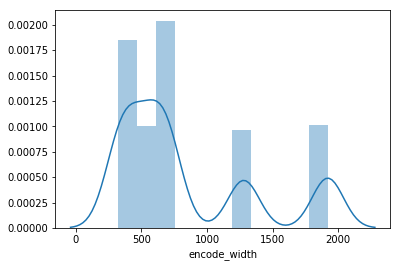

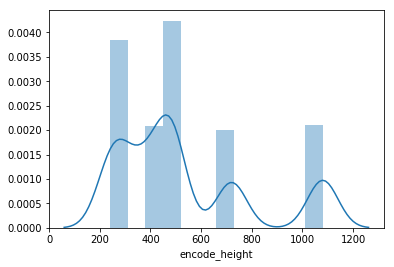

LinAlgError: singular matrix

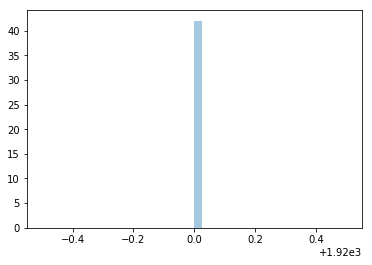

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for column in list(e_train):
    #plt.hist(e_train[column])
    sns.distplot(e_train[column])
    plt.show()

### normalise numerical data

In [13]:
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load
import numpy as np

numerical_columns =['clip_duration', 'clip_size', 'clip_bitrate_total','nr_of_images', 'nr_of_image_shifts', 'encode_bitrate_video','crf', 'vmaf'] 

for column in numerical_columns:
    normalizer = MinMaxScaler()
    normalizer.fit(e_train[column].values.reshape(-1,1))
    dump(normalizer, f"{column}_normalizer.pkl")
    e_train[column] = normalizer.transform(e_train[column].values.reshape(-1,1))
    e_test[column] = normalizer.transform(e_test[column].values.reshape(-1,1))
    

/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/sezin/PycharmProjects/Per-Title_encoding/venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on

In [14]:
print(e_test.head(10))

      encode_width  encode_height  clip_width  clip_height  clip_duration  \
1005           640            480        1920         1080       0.000000   
787            320            240        1920         1080       0.000000   
814           1920           1080        1920         1080       0.000000   
1689          1280            720        1920          816       0.748466   
2288           640            480        1920          816       0.803681   
1173           384            288        1920          816       0.631902   
938           1920           1080        1920         1080       0.000000   
21            1280            720        1920         1080       0.000000   
334            640            480        1920         1080       1.000000   
1621           512            384        1920         1056       0.809816   

      clip_size  clip_bitrate_total          video_profile clip_frame_rate  \
1005   0.000000            0.006559             High 4:2:2      30000/1001

### Categorical Data Transformation

In [15]:
from sklearn import preprocessing
import pandas as pd

categorical_columns =['encode_width', 'encode_height', 'clip_width', 'clip_height','video_profile', 'clip_frame_rate'] 

for column in categorical_columns:
    lb = preprocessing.LabelBinarizer()
    lb.fit(e_train[column].values.reshape(-1,1))
    dump(lb, f"{column}_label_binarizer.pkl")
    binarized_array_train = lb.transform(e_train[column].values.reshape(-1,1))
    column_names = [f"{column}_{i}" for i in list(lb.classes_)]
    
    binarized_df_train = pd.DataFrame(data=binarized_array_train, columns=column_names, index=e_train.index)
    e_train = pd.concat([e_train, binarized_df_train], axis=1, sort=False)
    e_train.drop(columns=[column], inplace=True)

    binarized_array_test = lb.transform(e_test[column].values.reshape(-1,1))
    binarized_df_test = pd.DataFrame(data=binarized_array_test, columns=column_names, index=e_test.index)
    e_test = pd.concat([e_test, binarized_df_test], axis=1, sort=False)
    e_test.drop(columns=[column], inplace=True)
    
    print(e_train.shape, e_test.shape)


(1800, 20) (451, 20)
(1800, 25) (451, 25)
(1800, 25) (451, 25)
(1800, 27) (451, 27)
(1800, 29) (451, 29)
(1800, 32) (451, 32)


In [16]:
print(e_train.head(5))

      clip_duration  clip_size  clip_bitrate_total       crf  \
688        0.000000   0.074130            0.080203  0.135135   
857        0.000000   0.026662            0.033046  0.054054   
28         0.000000   0.049233            0.055470  0.351351   
2          0.000000   0.049233            0.055470  0.054054   
1814       0.797546   0.436013            0.003759  0.189189   

      encode_bitrate_video  nr_of_images  nr_of_image_shifts      vmaf  \
688               0.180329      0.333333            0.354839  0.869014   
857               0.066675      0.166667            0.258065  0.703369   
28                0.034649      0.333333            0.225806  0.669652   
2                 0.447056      0.333333            0.225806  0.995150   
1814              0.014284      0.500000            0.161290  0.762248   

      encode_width_320  encode_width_384  ...  clip_height_816  \
688                  0                 0  ...                0   
857                  0                

In [26]:
e_test.shape

(451, 32)

### Test Model

In [17]:
data_y_train = e_train['vmaf']
data_X_train = e_train.drop(columns=['vmaf'])

data_y_test = e_test['vmaf']
data_X_test = e_test.drop(columns=['vmaf'])

In [18]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(data_X_train, data_y_train)
print(linear_regression_model.coef_)

[-5.26741377e-01  8.69409833e-01 -9.22527767e-01 -7.65907292e-01
  1.56899351e-01 -9.21118441e-02  1.31164940e-01 -3.56118446e+10
 -3.91701829e+10 -1.16060295e+10  2.49279940e+10  2.49279940e+10
 -2.59481602e+10 -6.13532087e+10 -1.93590340e+10 -1.58006957e+10
 -4.33648490e+10 -7.98988726e+10 -2.90227184e+10  6.38233017e+09
  0.00000000e+00  3.81402997e+11  3.81402997e+11  2.66815791e+11
 -4.01509378e+11  1.25953091e+12 -3.30440728e+11  3.52070289e+11
  3.52070289e+11  5.37726145e+11 -1.12331415e+12]


In [19]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = linear_regression_model.predict(data_X_train)
y_scaler = load('vmaf_normalizer.pkl')
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(-1,1))
data_y_train = y_scaler.inverse_transform(np.array(data_y_train).reshape(-1,1))

print("Linear Regression - Mean Absolute Error:", mae(y_pred=y_pred, y_true=data_y_train))
print("Linear Regression - Mean Absolute Percentage Error:", np.mean(abs(data_y_train-y_pred)/abs(data_y_train)),"%")

Linear Regression - Mean Absolute Error: 5.334905174747247
Linear Regression - Mean Absolute Percentage Error: 2.223240205230439 %


In [20]:
from sklearn.metrics import mean_absolute_error as mae

y_pred_test = linear_regression_model.predict(data_X_test)
y_scaler = load('vmaf_normalizer.pkl')
y_pred_test = y_scaler.inverse_transform(np.array(y_pred_test).reshape(-1,1))
data_y_test = y_scaler.inverse_transform(np.array(data_y_test).reshape(-1,1))

print("Linear Regression - Mean Absolute Error:", mae(y_pred=y_pred_test, y_true=data_y_test))
print("Linear Regression - Mean Absolute Percentage Error:", np.mean(abs(data_y_test-y_pred_test)/abs(data_y_test)),"%")

Linear Regression - Mean Absolute Error: 5.111126814599285
Linear Regression - Mean Absolute Percentage Error: 1.0299794986783215 %


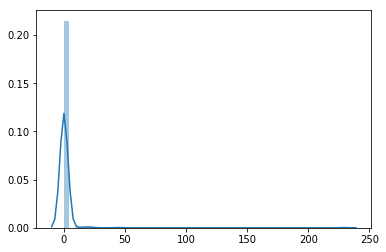

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(abs(data_y_test-y_pred_test)/abs(data_y_test))
plt.show()